# <center> <span style='color:#3c3b5f'>Ejercitación módulo Matplotlib</span></center>

Módulo Pandas - Parte práctica

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid gray"> </hr>

## <span style='color:#55aa74'>1. Analizando datos de eficiencia energética (obligatorio)</span>

Cargue el archivo *eficienciaEnergética.csv*. Agregue una columna llamada *superficieTotal* que sea la suma de las columnas *Surface_Area, Wall_Area, Roof_Area*. Agreuge una columna llamada *cargaTotal* que sea la suma de *Heating_Load, Cooling_Load*.

Luego,

- Realice un gráfico de dispersión comparando *superficieTotal* con *cargaTotal*. Utilice los datos de la columna *Orientation* para diferenciar cada punto de la gráfica según la orientación de la casa.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## TODO 1
efiecienciaEnergetica = pd.read_csv("datasets\eficienciaEnergética.csv")
efiecienciaEnergetica["cargaTotal"]=efiecienciaEnergetica[["Heating_Load","Cooling_Load"]].sum(axis=1)

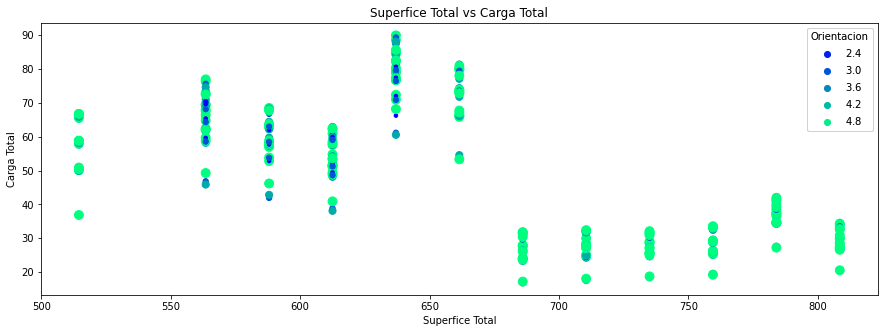

In [4]:
fig, ax = plt.subplots(figsize = (15,5)) #Definimos la figura a realizar, los ejes de cordenadas y tamaño
area=(np.pi*((efiecienciaEnergetica["Orientation"])**2))#Determinamos el tamaño de los puntos en relacion a su orientacion, para discriminar de mejor mañera en complemento con colores 
scatter=ax.scatter(efiecienciaEnergetica["Surface_Area"],efiecienciaEnergetica["cargaTotal"], c=efiecienciaEnergetica["Orientation"], s=area, cmap="winter") #Carga vs Área, discrimianada por orientacion
ax.set_xlabel("Superfice Total")
ax.set_ylabel("Carga Total")
ax.set_title("Superfice Total vs Carga Total")

legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper right", title="Orientacion") # Etiqueta que discrimina la dispersión de los graficos según la orientación
ax.add_artist(legend1)
plt.show()

## <span style='color:#55aa74'>2. Personas en situación de calle (obligatorio)</span>

Utilizando los datos dentro de *sinhogares.csv* se le pide.

- Un gráfico de barras verticales donde se muestre el valor medio de individuos en situación de calles separados por *región*. Agregue el desvío estándar a cada barra.

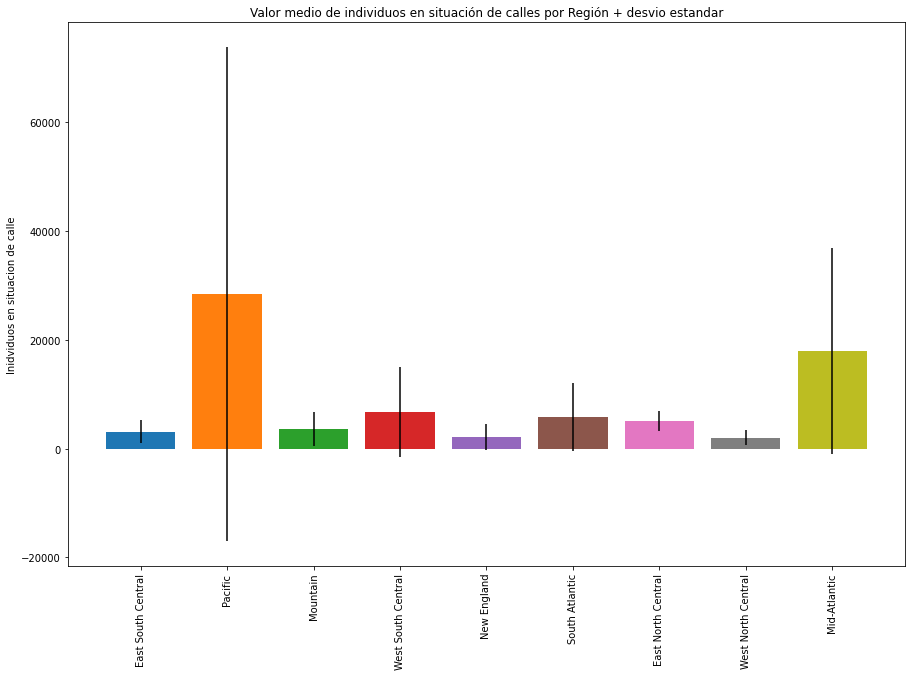

In [5]:
## TODO 2
sH = pd.read_csv("datasets\sinhogares.csv")

fig, ax = plt.subplots(figsize = (15,10))#Definimos la figura a realizar, los ejes de cordenadas y tamaño

regiones = sH["region"].unique()

for region in regiones:
    dfReducido = sH[sH["region"] == region]
    ax.bar(region, dfReducido["individuos"].mean(), yerr = dfReducido["individuos"].std())
    # Generado el grafico de barras de cada region por por el calculo de su media y se grafica el desvio estandar con la linea media(yerr)
    
ax.set_title("Valor medio de individuos en situación de calles por Región + desvio estandar") #Etiqueta del titulo del grafico
ax.set_ylabel("Individuos en situacion de calle") #Etiqueta eje x 
ax.xaxis.set_ticks(regiones)
ax.set_xticklabels(regiones, rotation=90)
plt.show()

## <span style='color:#55aa74'>3. Gráficas de ventas para Walmart (obligatorio)</span>

Utilizando los datos en *walmart.csv* realice lo siguiente.

- Un gráfico con 5 subplots diferentes en donde debe graficar las ventas semanales (a lo largo de todo el dataset) para los 5 departamentos con mayores ventas promedios.
- Un gráfico con las ventas semanales (a lo largo de todo el dataset) del departamento con mayor ventas semanales promedios. Agregue al gráfico **marcadores** en donde la columna *is_holiday* es igual a *True*. Puede agregar marcas a un gráfico del tipo `.plot()` usando el atributo `markevery`. Utilice [ésta](https://matplotlib.org/stable/gallery/lines_bars_and_markers/markevery_demo.html) referencia como ejemplo.

In [10]:
## TODO 3
walmart = pd.read_csv("datasets\walmart.csv")
walmart


,store,type,department,date,weekly_sales,is_holiday,temperature,fuel_price,unemployment
0,1,A,1,2/5/2010,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,3/5/2010,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,4/2/2010,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,5/7/2010,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,6/4/2010,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,12/9/2011,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2/3/2012,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,6/8/2012,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,7/13/2012,0.06,False,25.644444,0.860145,6.623


In [11]:
import operator

walmart['date'] = pd.to_datetime(walmart.date)
tablaDpto = walmart.pivot_table(values = "weekly_sales", columns = walmart.date.dt.year, index = "department", sort="weekly_sales")

#Ordenamos de mayor a menor los departamentos con ventas semanales promedios
departamentos=walmart["department"].unique()
promedio={}
num=sorted(departamentos)
for i in num:
    a=round(tablaDpto.loc[i].mean(),2)
    promedio[i]=a

depto_sort = sorted(promedio.items(), key=operator.itemgetter(1), reverse=True)#Se ordena de mayor a menor el diccionario, por el valor (key=operator.itemgetter(1) o 0 para key, reverse=True o False para orden normal)

#PARA GRAFICAR
years=tablaDpto.columns.tolist()
depto1 = tablaDpto.loc[depto_sort[0][0]].values# Busca en la pivotetable el departamento con mayor venta promedio para graficar sus valores durante los años transcurrido en el dataframe.
depto2 = tablaDpto.loc[depto_sort[1][0]].values# Busca en la pivotetable el segundo departamento con mayor venta promedio para graficar sus valores durante los años transcurrido en el dataframe.
depto3 = tablaDpto.loc[depto_sort[2][0]].values# Idem para el tercero
depto4 = tablaDpto.loc[depto_sort[3][0]].values#4to
depto5 = tablaDpto.loc[depto_sort[4][0]].values#5to

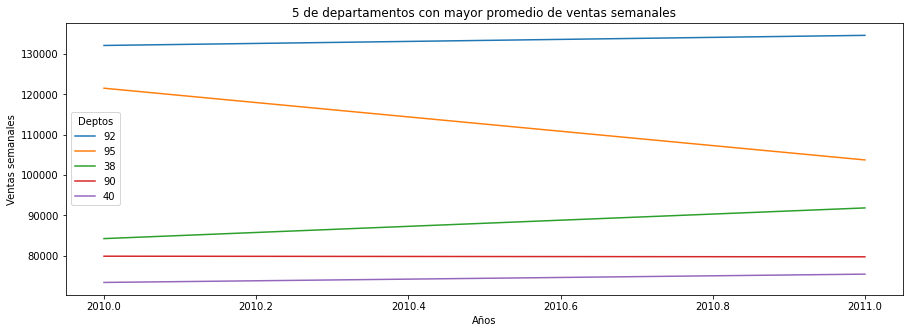

In [12]:
## Graficamos los datos en un gráfico de lineas
fig, ax = plt.subplots(figsize = (15,5))
ax.set_title("5 Departamentos con mayor promedio de ventas semanales")
#A continación se realiza el grafico de linea de años vs ventas semanales por año que van desde el dpto 1 al dpto 5
ax.plot(years, depto1) #dpto 1
ax.plot(years, depto2) #dpto 2
ax.plot(years, depto3) #dpto 3
ax.plot(years, depto4) #dpto 4
ax.plot(years, depto5) #dpto 5

#Leyenda
ax.legend([depto_sort[0][0],depto_sort[1][0],depto_sort[2][0],depto_sort[3][0],depto_sort[4][0]], title = "Deptos")
ax.set_xlabel("Años")
ax.set_ylabel("Ventas Semanales")
plt.show()# Se grafican los 5 dptos en una soloa figura

## <span style='color:#55aa74'>4. Graficando datos del FIFA 2021(obligatorio)</span>

A partir de los datos en el set de datos *fifa2021.csv* realice,

- Un gráfico de barras horizontales con la cantidad de jugadores divididos por países.
- Histogramas (en un mismo gráfico) de las alturas (columna *height_cm*) para jugadores de Argentina, Uruguay, Alemania, Nigeria y Kosovo.

**¿Qué liga vale más dinero?**

- Realice un gráfico de barras verticales en donde se muestre el valor en euros de las ligas en la lista `ligas` en base a los precios de los jugadores que juegan en ella.

```python
ligas = ['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga', 'French Ligue 1', 'English Premier League', 'Holland Eredivisie', 'USA Major League Soccer', 'Chinese Super League', 'Saudi Abdul L. Jameel League', 'Turkish Süper Lig', 'Argentina Primera División', 'Uruguayan Primera División']
```

- Repita el ejercicio 5.1 de la *guía de ejercicios de Pandas*. Luego realice un gráfico de dispersión en donde se compare el precio de cada jugador con su *overall*. Discrimine los colores de los puntos en base a la columna *onePosition* obtenida luego de resolver la parte 5.1.

In [13]:
## TODO 4
fifa21 = pd.read_csv("datasets/fifa2021.csv")
fifa21 = fifa21.drop(["sofifa_id","player_url","long_name","dob","team_jersey_number","ls","st"], axis=1)
fifa21 = fifa21.drop(['league_rank', 'release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'defending_marking','real_face'], axis = 1)## todo este proceso se usa para quitar los valores NaN
fifa21.head(1)

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,...,95,75,96,35,24,6,11,15,14,8


C:\Users\juani\AppData\Local\Temp\ipykernel_576\220602371.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


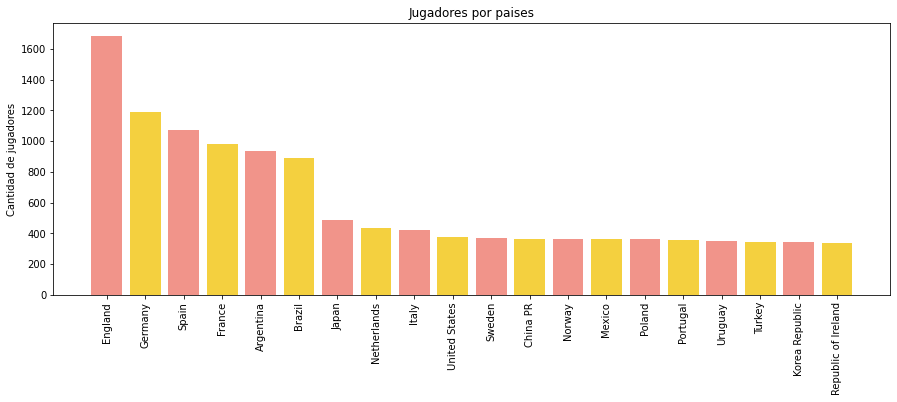

In [14]:
fig, ax = plt.subplots(figsize = (15,5))
nacionalidades = fifa21.nationality.value_counts()
nacionalidades.sort_values(ascending=False, inplace=True)

# Grafico de los primeros 20 paises con mas jugadores en el mundo
x = list(nacionalidades.iloc[0:20].index)
ax.bar(x,y,color=["#F1948A","#F4D03F"])
    
ax.set_title("Jugadores por paises")
ax.set_ylabel("Cantidad de jugadores")
ax.set_xticklabels(x, rotation=90)
plt.show()

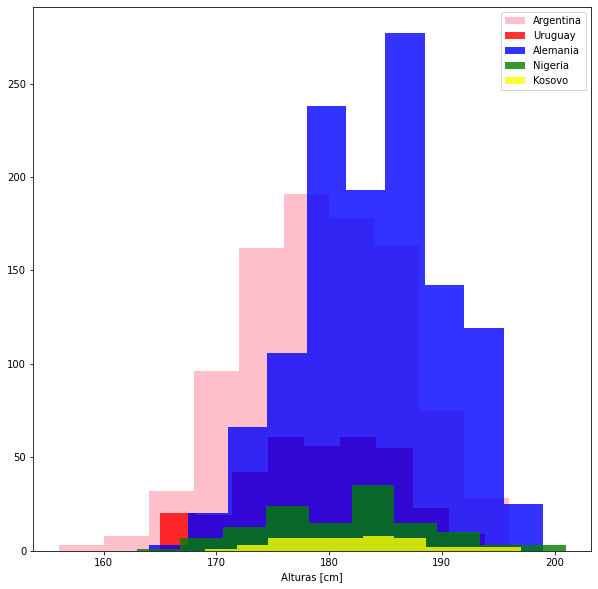

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
# Generamos el historgrama segun la altura los paises solicitados en ejercicio especificado en la guía anterior 
ax.hist(fifa21[fifa21["nationality"]=="Argentina"]["height_cm"], label = "Argentina", color = "pink")
ax.hist(fifa21[fifa21["nationality"]=="Uruguay"]["height_cm"], label = "Uruguay", color = "red", alpha=0.8) #Se cambian los alphas para generar una transparencía y podes apreciar todos los histogramas
ax.hist(fifa21[fifa21["nationality"]=="Germany"]["height_cm"], label = "Alemania", color = "blue",alpha = 0.8)
ax.hist(fifa21[fifa21["nationality"]=="Nigeria"]["height_cm"], label = "Nigeria", color = "green", alpha=0.8)
ax.hist(fifa21[fifa21["nationality"]=="Kosovo"]["height_cm"], label = "Kosovo", color = "yellow", alpha=0.8)
ax.set_xlabel("Alturas [cm]")
ax.set_ylabel("")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Nombre de la liga', ylabel='Valor [eur]'>

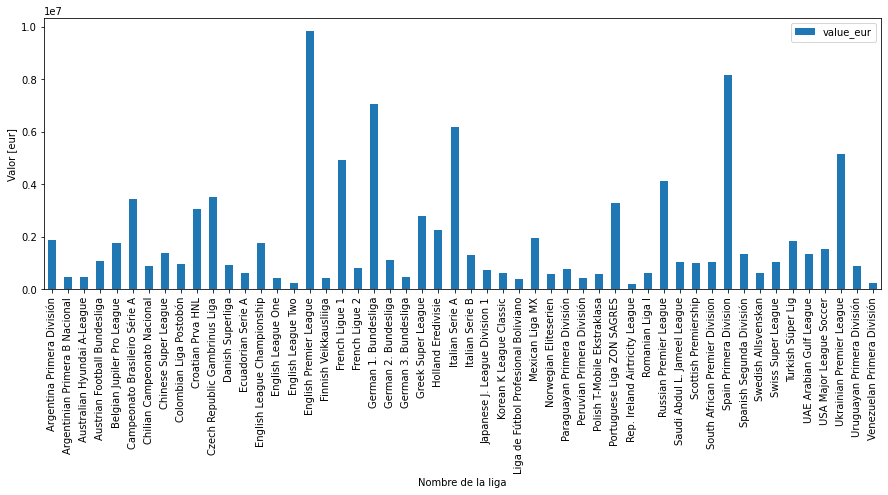

In [17]:
#Grafico de las diferntes ligas y sus correspondientes valores totales
ligas = fifa21.pivot_table(values = "value_eur", index = "league_name")
ligas.plot.bar(figsize = (15,5),xlabel=("Nombre de la liga"), ylabel=("Valor [eur]"))

In [18]:
jugadoresArgentina = fifa21[fifa21["nationality"] == "Argentina"]
jugadoresArgentina.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality',
       'club_name', 'league_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeepin

In [20]:
posiciones=[]
posicionesNum=[]

i = 0
for position in fifa21["player_positions"]:
    
    listaPos = position.split(",") # Spliteamos cada elemento de la columana player_positions con una coma

    if listaPos[0] in ['ST','CF','RW','LW']: # Se verifica si el primer elemento del split esta en esta lista para saber si es atacante
        posicionesNum.append(1) # Se le asigan un numero a atacnate para usar para discrimianr por colores en el grafico
        posiciones.append("Atacante") #se agrega a una lista, que esa lista luego sera una nueva columna del dataframe
        #fifa21["onePosition"][i] = "Atacante"
    
    if listaPos[0] in ['LM','RM','CM','CDM','CAM', "RWB"]: # Se repite lo descripto anteriormente para Mediocampo
        posicionesNum.append(2)
        posiciones.append("Mediocampista")
        
    
    if listaPos[0] in ['LB','RB','CB', 'LWB']:# Se repite lo descripto anteriormente para Defensores
        posicionesNum.append(3)
        posiciones.append("Defensor")

    if listaPos[0] in ['GK']: # Se repite lo descripto anteriormente para Arquero
        posicionesNum.append(4)
        posiciones.append("Arquero")
    
    i+=1

fifa21["onePosition"]=posiciones#Se asigan la lista de str segun su posicion primaria a la columna nueva onePosition del dataframe
fifa21["onePositionPonderado"]=posicionesNum#Igual para las posiciones discriminadas por numeros

fifa21

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,onePosition,onePositionPonderado
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,...,96,35,24,6,11,15,14,8,Atacante,1
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,...,95,32,24,7,11,15,14,11,Atacante,1
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,...,68,12,18,87,92,78,90,90,Arquero,4
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,...,88,42,19,15,6,12,8,10,Atacante,1
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,...,93,30,29,9,9,15,15,11,Atacante,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,47,52,40000,...,36,39,54,10,9,14,6,6,Mediocampista,2
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,47,52,35000,...,40,56,47,12,13,8,14,6,Defensor,3
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,47,51,35000,...,40,55,45,12,9,14,15,13,Defensor,3
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,47,51,40000,...,43,49,45,15,7,7,5,13,Mediocampista,2


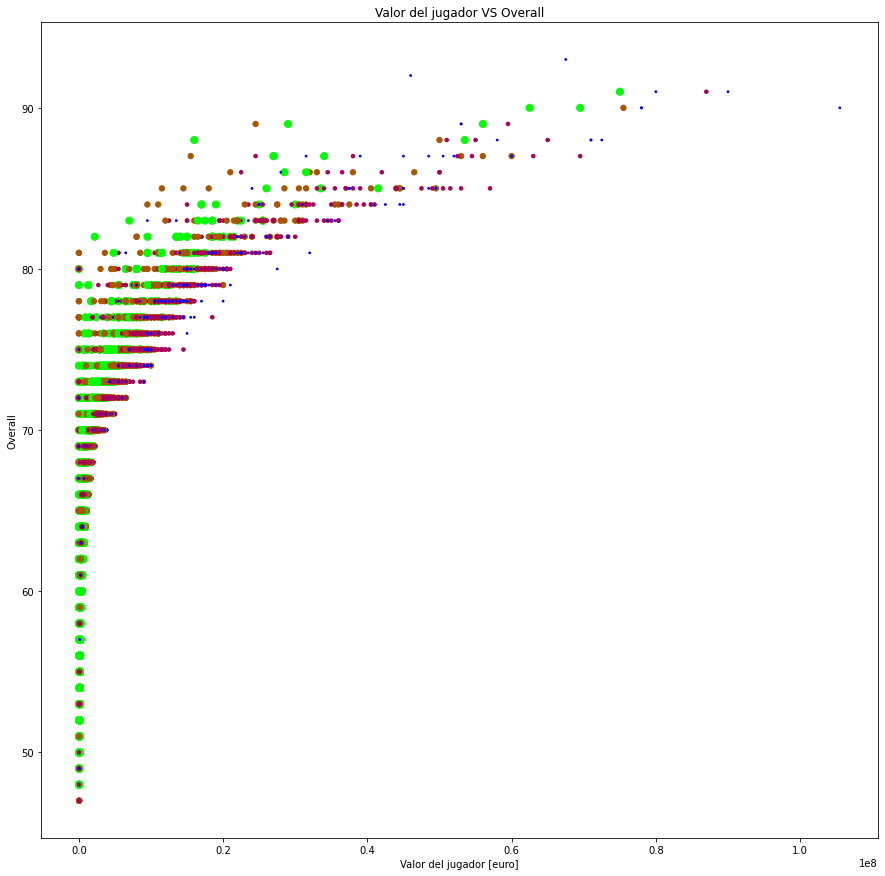

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
a=['Atacante', 'Arquero', 'Mediocampista', 'Defensor']
area=(np.pi*((fifa21["onePositionPonderado"])**2))#Se utuliza la posicion numeral para discriminar por area
scatter=ax.scatter(fifa21["value_eur"],fifa21["overall"], c=fifa21["onePositionPonderado"].values, s=area, cmap="brg")  #Se realiza un grafico de comparación de los valores en euros de los jugadores según su Overall
ax.set_xlabel("Valor del jugador [euro]")
ax.set_ylabel("Overall")
ax.set_title("Valor del jugador VS Overall")

plt.show()

<hr style="border:1px solid #2C3E50"> </hr>

### FIN